# Agent Behavior Visualization

This notebook implements visualization tools for analyzing agent behaviors in a SAT solver environment. We'll create visualizations to track agent movements, interactions, and other behaviors over time.

## Import Required Libraries

In [3]:
# Import necessary libraries for data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import plotly.express as px
import plotly.graph_objects as go
from scipy.spatial.distance import pdist, squareform

## Load the Agent Behavior Data

In this section, we'll load and prepare the agent behavior data for visualization.

In [4]:
# Define a function to read agent data from CSV files
def load_agent_data(file_path):
    """
    Load agent behavior data from a CSV file
    
    Parameters:
    file_path (str): Path to the CSV file containing agent data
    
    Returns:
    pandas.DataFrame: Data frame containing agent behavior data
    """
    try:
        data = pd.read_csv(file_path)
        print(f"Data loaded successfully with {data.shape[0]} rows and {data.shape[1]} columns")
        print(f"Columns: {data.columns.tolist()}")
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Example usage (replace with your actual data path)
# For demonstration, we'll create simulated data if a file is not specified
file_path = "agent_behavior_data.csv"  # Update this path as needed

# Create synthetic data if needed for demonstration
def create_sample_data(num_agents=5, timestamps=100):
    """Generate synthetic agent behavior data for demonstration"""
    agent_ids = range(1, num_agents + 1)
    data = []
    
    for t in range(timestamps):
        for agent_id in agent_ids:
            # Simulate random walk with some drift
            x = np.sin(t/10) * 5 + np.random.normal(0, 1) + agent_id
            y = np.cos(t/10) * 5 + np.random.normal(0, 1) + agent_id
            
            # Add some variables representing agent state
            state = np.random.choice(['searching', 'exploiting', 'backtracking'])
            energy = max(0, 100 - t/2 + np.random.normal(0, 5))
            
            data.append({
                'timestamp': t,
                'agent_id': agent_id,
                'x_position': x,
                'y_position': y,
                'state': state,
                'energy': energy,
                'success_rate': np.random.uniform(0.2, 0.8)
            })
    
    return pd.DataFrame(data)

# Try to load the data, or create sample data if the file doesn't exist
try:
    agent_data = load_agent_data(file_path)
    if agent_data is None:
        print("Using synthetic data for demonstration")
        agent_data = create_sample_data()
except:
    print("Using synthetic data for demonstration")
    agent_data = create_sample_data()

# Display the first few rows of the data
agent_data.head()

Error loading data: [Errno 2] No such file or directory: 'agent_behavior_data.csv'
Using synthetic data for demonstration


,timestamp,agent_id,x_position,y_position,state,energy,success_rate
0,0,1,0.983425,6.626835,searching,102.492997,0.212019
1,0,2,0.688613,7.552624,backtracking,103.544113,0.652918
2,0,3,3.626070,8.615980,searching,109.311110,0.375304
3,0,4,2.217257,8.786101,backtracking,102.138584,0.319406
4,0,5,4.143518,10.487310,exploiting,97.999917,0.421811


## Visualize Agent Movements

Now we'll create visualizations to track agent movements over time. This includes:
1. Static plots of agent positions
2. Trajectory plots showing agent movements over time
3. Animated visualizations of agent movements

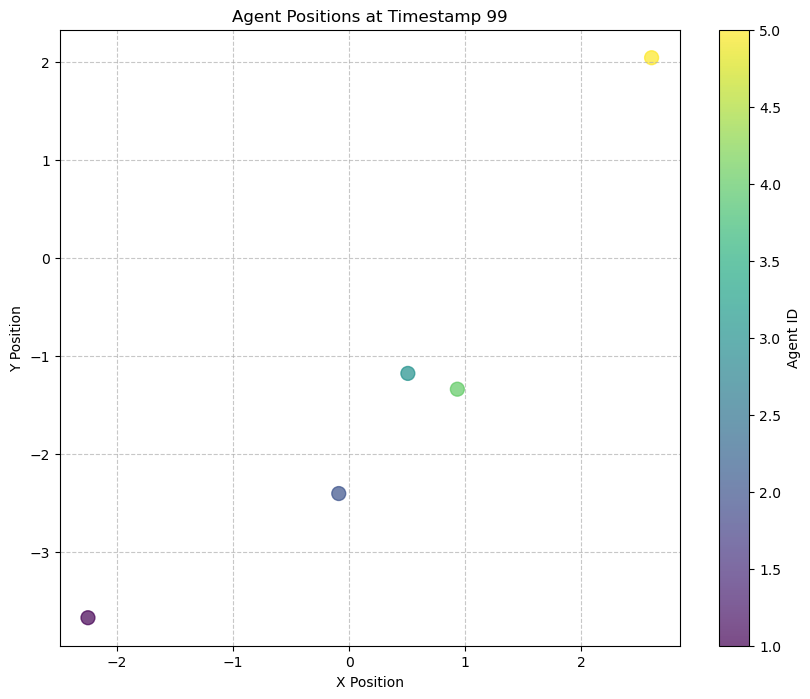

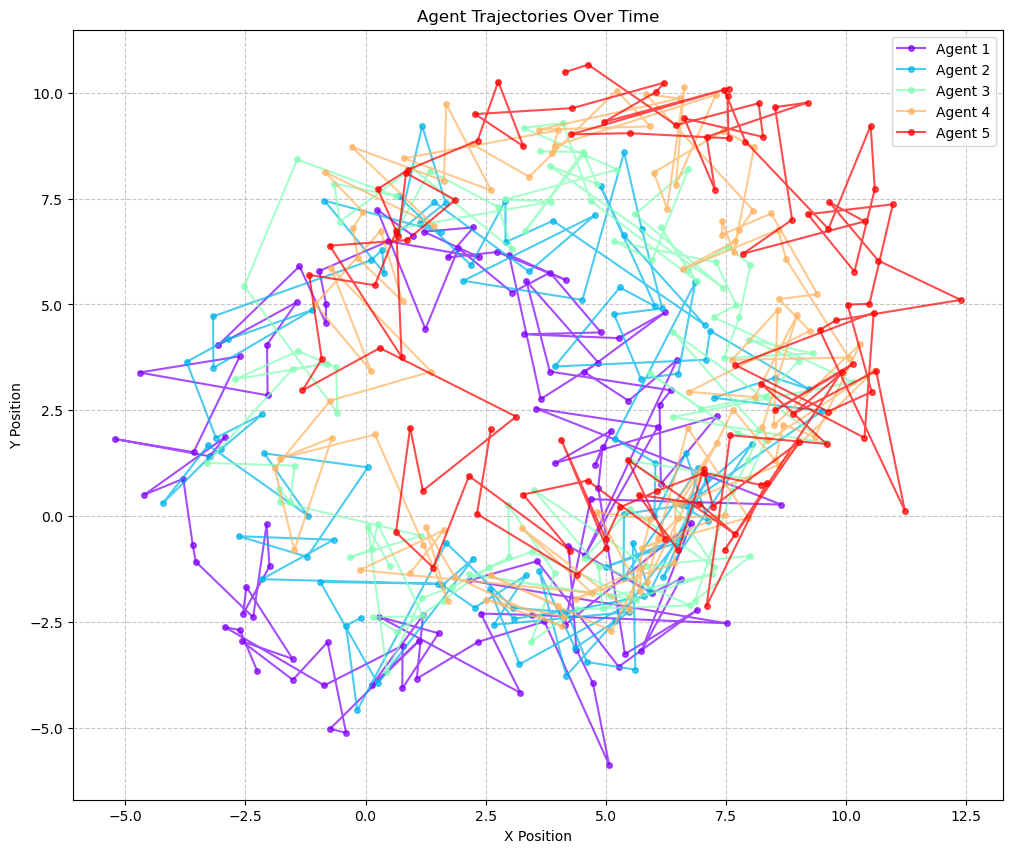

In [5]:
# Function to create static plot of agent positions at a specific time
def plot_agent_positions(data, timestamp=None):
    """
    Plot agent positions at a specific timestamp
    
    Parameters:
    data (pandas.DataFrame): Agent behavior data
    timestamp (int): Specific timestamp to visualize (if None, use the last timestamp)
    """
    if timestamp is None:
        timestamp = data['timestamp'].max()
    
    # Filter data for the specific timestamp
    time_data = data[data['timestamp'] == timestamp]
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    
    # Create a scatter plot of agent positions
    scatter = plt.scatter(
        time_data['x_position'], 
        time_data['y_position'],
        c=time_data['agent_id'],
        s=100,
        cmap='viridis',
        alpha=0.7
    )
    
    # Add labels and title
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title(f'Agent Positions at Timestamp {timestamp}')
    
    # Add a legend to identify agents
    plt.colorbar(scatter, label='Agent ID')
    
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Function to plot agent trajectories over time
def plot_agent_trajectories(data, agent_ids=None):
    """
    Plot the trajectories of agents over time
    
    Parameters:
    data (pandas.DataFrame): Agent behavior data
    agent_ids (list): List of agent IDs to include (None = all agents)
    """
    plt.figure(figsize=(12, 10))
    
    if agent_ids is None:
        agent_ids = sorted(data['agent_id'].unique())
    
    colors = plt.cm.rainbow(np.linspace(0, 1, len(agent_ids)))
    
    for i, agent_id in enumerate(agent_ids):
        agent_data = data[data['agent_id'] == agent_id]
        plt.plot(
            agent_data['x_position'],
            agent_data['y_position'],
            '-o',
            linewidth=1.5,
            markersize=4,
            alpha=0.7,
            color=colors[i],
            label=f'Agent {agent_id}'
        )
    
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('Agent Trajectories Over Time')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Create an interactive animation of agent movements using Plotly
def create_agent_animation(data, max_frames=100):
    """
    Create an interactive animation of agent movements
    
    Parameters:
    data (pandas.DataFrame): Agent behavior data
    max_frames (int): Maximum number of frames to include in the animation
    
    Returns:
    plotly.graph_objects.Figure: Interactive animation figure
    """
    # Get unique timestamps and agent IDs
    timestamps = sorted(data['timestamp'].unique())
    
    # Limit the number of frames if needed
    if len(timestamps) > max_frames:
        timestamps = timestamps[:max_frames]
    
    # Create the figure
    fig = px.scatter(
        data_frame=data[data['timestamp'].isin(timestamps)],
        x='x_position',
        y='y_position',
        animation_frame='timestamp',
        animation_group='agent_id',
        color='agent_id',
        size='energy',
        hover_name='agent_id',
        hover_data=['state', 'success_rate'],
        title='Agent Movement Animation',
        labels={'x_position': 'X Position', 'y_position': 'Y Position'},
        range_x=[data['x_position'].min() - 1, data['x_position'].max() + 1],
        range_y=[data['y_position'].min() - 1, data['y_position'].max() + 1]
    )
    
    # Customize the animation
    fig.update_layout(
        autosize=True,
        width=900,
        height=700
    )
    
    return fig

# Execute visualization functions
plot_agent_positions(agent_data)
plot_agent_trajectories(agent_data)
animation = create_agent_animation(agent_data)
animation

## Analyze Agent Interactions

This section focuses on visualizing interactions between agents, such as proximity, collisions, or other defined interaction metrics.

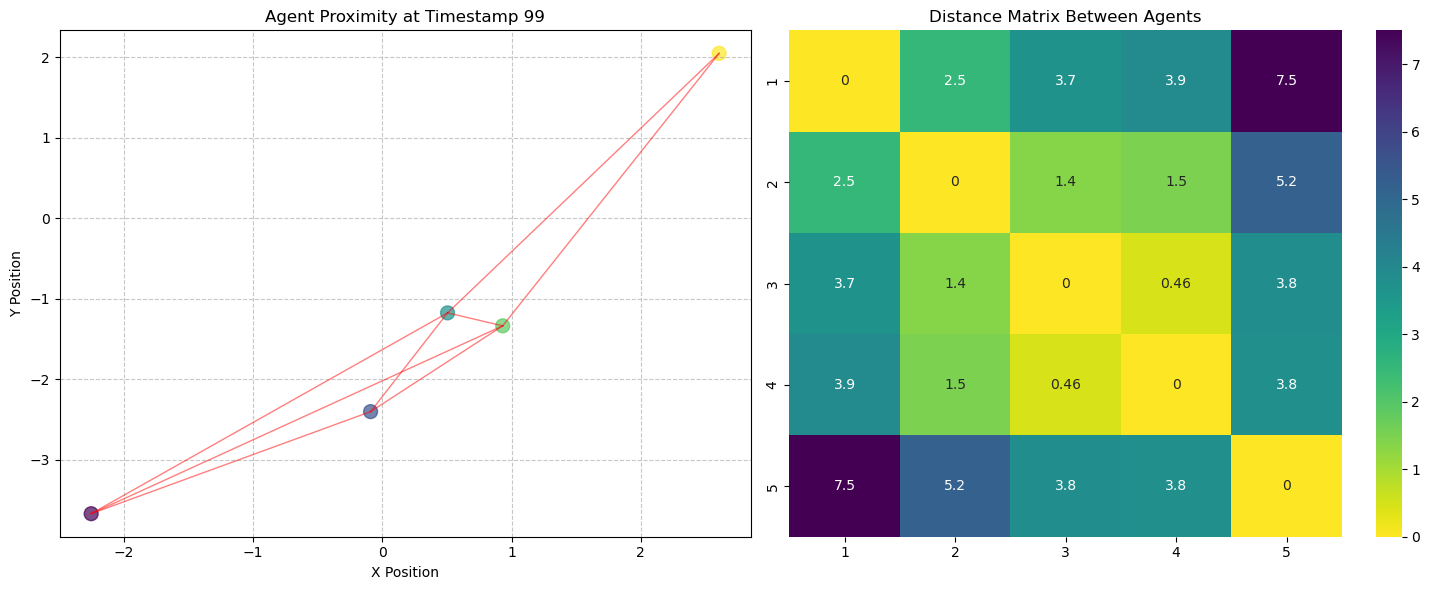

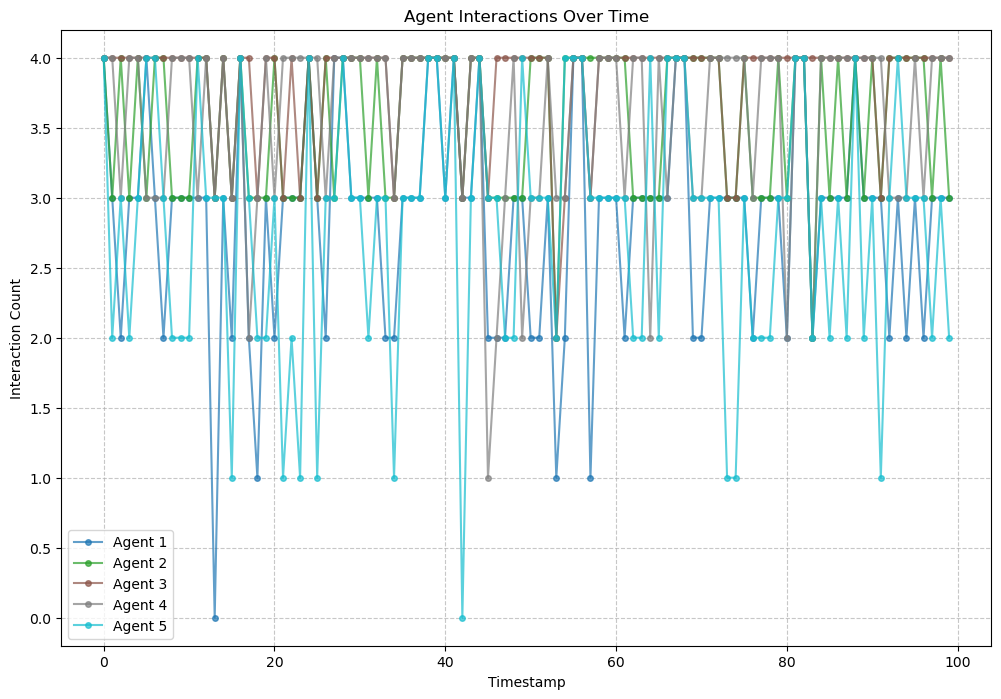

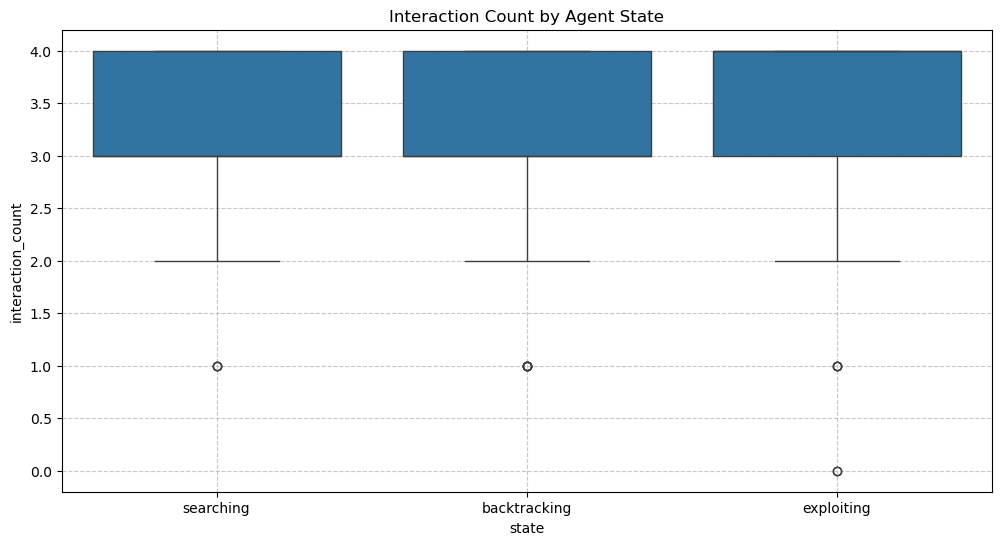

In [6]:
# Function to calculate distances between agents at each timestamp
def calculate_agent_distances(data):
    """
    Calculate distances between all pairs of agents at each timestamp
    
    Parameters:
    data (pandas.DataFrame): Agent behavior data
    
    Returns:
    dict: Dictionary mapping timestamps to distance matrices
    """
    distances = {}
    
    for timestamp in sorted(data['timestamp'].unique()):
        time_data = data[data['timestamp'] == timestamp]
        
        # Get positions of all agents
        positions = time_data[['x_position', 'y_position']].values
        
        # Calculate pairwise distances
        if len(positions) > 1:
            dist_matrix = squareform(pdist(positions))
            agent_ids = time_data['agent_id'].values
            
            # Create a DataFrame with agent IDs as indices and columns
            dist_df = pd.DataFrame(
                dist_matrix,
                index=agent_ids,
                columns=agent_ids
            )
            
            distances[timestamp] = dist_df
    
    return distances

# Function to visualize agent proximity at a specific timestamp
def plot_agent_proximity(data, timestamp=None, threshold=5.0):
    """
    Visualize agent proximity at a specific timestamp
    
    Parameters:
    data (pandas.DataFrame): Agent behavior data
    timestamp (int): Timestamp to analyze (if None, use the last timestamp)
    threshold (float): Distance threshold for considering agents to be "close"
    """
    if timestamp is None:
        timestamp = data['timestamp'].max()
    
    # Filter data for the specific timestamp
    time_data = data[data['timestamp'] == timestamp]
    
    # Get positions and calculate distances
    positions = time_data[['x_position', 'y_position']].values
    agent_ids = time_data['agent_id'].values
    
    if len(positions) <= 1:
        print(f"Not enough agents at timestamp {timestamp} for proximity analysis")
        return
    
    dist_matrix = squareform(pdist(positions))
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot agent positions
    scatter = ax1.scatter(
        time_data['x_position'], 
        time_data['y_position'],
        c=time_data['agent_id'],
        s=100,
        cmap='viridis',
        alpha=0.7
    )
    
    # Add lines between agents that are close to each other
    for i in range(len(agent_ids)):
        for j in range(i+1, len(agent_ids)):
            if dist_matrix[i, j] < threshold:
                ax1.plot(
                    [positions[i, 0], positions[j, 0]],
                    [positions[i, 1], positions[j, 1]],
                    'r-',
                    alpha=0.5,
                    linewidth=1.0
                )
    
    ax1.set_xlabel('X Position')
    ax1.set_ylabel('Y Position')
    ax1.set_title(f'Agent Proximity at Timestamp {timestamp}')
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Plot distance matrix as a heatmap
    sns.heatmap(
        pd.DataFrame(dist_matrix, index=agent_ids, columns=agent_ids),
        annot=True,
        cmap='viridis_r',
        ax=ax2
    )
    ax2.set_title('Distance Matrix Between Agents')
    
    plt.tight_layout()
    plt.show()

# Function to analyze agent interaction patterns over time
def analyze_interaction_patterns(data, threshold=5.0):
    """
    Analyze patterns of agent interactions over time
    
    Parameters:
    data (pandas.DataFrame): Agent behavior data
    threshold (float): Distance threshold for considering agents to be interacting
    
    Returns:
    pandas.DataFrame: Data frame with interaction metrics over time
    """
    interaction_data = []
    
    # Get all agent IDs
    all_agent_ids = sorted(data['agent_id'].unique())
    
    # Analyze each timestamp
    for timestamp in sorted(data['timestamp'].unique()):
        time_data = data[data['timestamp'] == timestamp]
        
        # Skip if not enough agents
        if len(time_data) <= 1:
            continue
        
        # Calculate distances between agents
        positions = time_data[['x_position', 'y_position']].values
        dist_matrix = squareform(pdist(positions))
        agent_ids = time_data['agent_id'].values
        
        # Count interactions for each agent
        for i, agent_id in enumerate(agent_ids):
            # Count how many other agents are within threshold
            interaction_count = np.sum(dist_matrix[i, :] < threshold) - 1  # -1 to exclude self
            
            # Get agent state
            agent_state = time_data[time_data['agent_id'] == agent_id]['state'].values[0]
            
            interaction_data.append({
                'timestamp': timestamp,
                'agent_id': agent_id,
                'interaction_count': interaction_count,
                'state': agent_state
            })
    
    interaction_df = pd.DataFrame(interaction_data)
    return interaction_df

# Function to visualize interaction patterns
def plot_interaction_patterns(interaction_df):
    """
    Visualize patterns of agent interactions over time
    
    Parameters:
    interaction_df (pandas.DataFrame): Output from analyze_interaction_patterns
    """
    plt.figure(figsize=(12, 8))
    
    # Get all agent IDs
    agent_ids = sorted(interaction_df['agent_id'].unique())
    colors = plt.cm.tab10(np.linspace(0, 1, len(agent_ids)))
    
    # Plot interaction count for each agent over time
    for i, agent_id in enumerate(agent_ids):
        agent_data = interaction_df[interaction_df['agent_id'] == agent_id]
        plt.plot(
            agent_data['timestamp'],
            agent_data['interaction_count'],
            '-o',
            linewidth=1.5,
            markersize=4,
            alpha=0.7,
            color=colors[i % len(colors)],
            label=f'Agent {agent_id}'
        )
    
    plt.xlabel('Timestamp')
    plt.ylabel('Interaction Count')
    plt.title('Agent Interactions Over Time')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    
    # Plot interaction count by agent state
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='state', y='interaction_count', data=interaction_df)
    plt.title('Interaction Count by Agent State')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Execute interaction analysis
agent_distances = calculate_agent_distances(agent_data)
plot_agent_proximity(agent_data)
interaction_df = analyze_interaction_patterns(agent_data)
plot_interaction_patterns(interaction_df)

## Customize Visualization Parameters

This section provides functionality to customize the visualization parameters, allowing for more flexible analysis of agent behaviors.

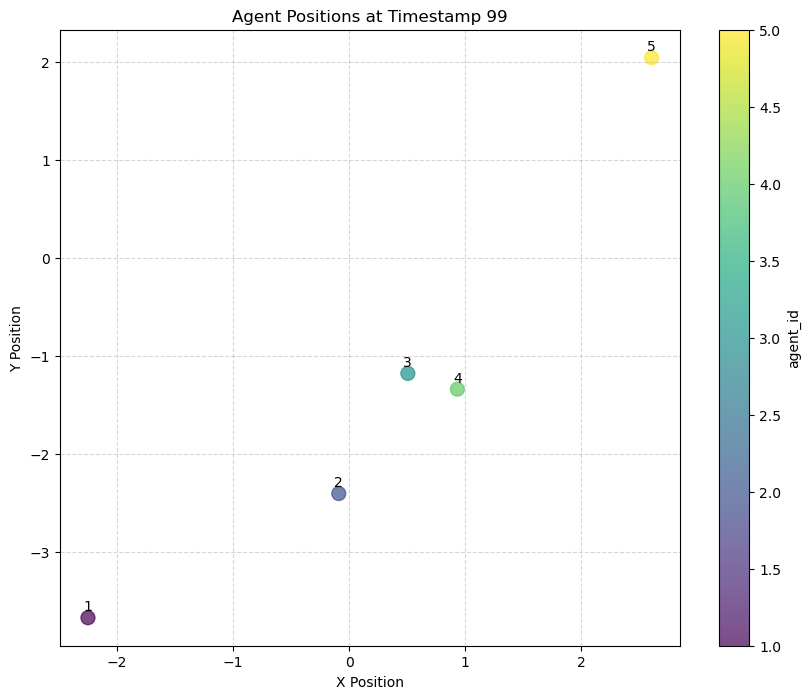

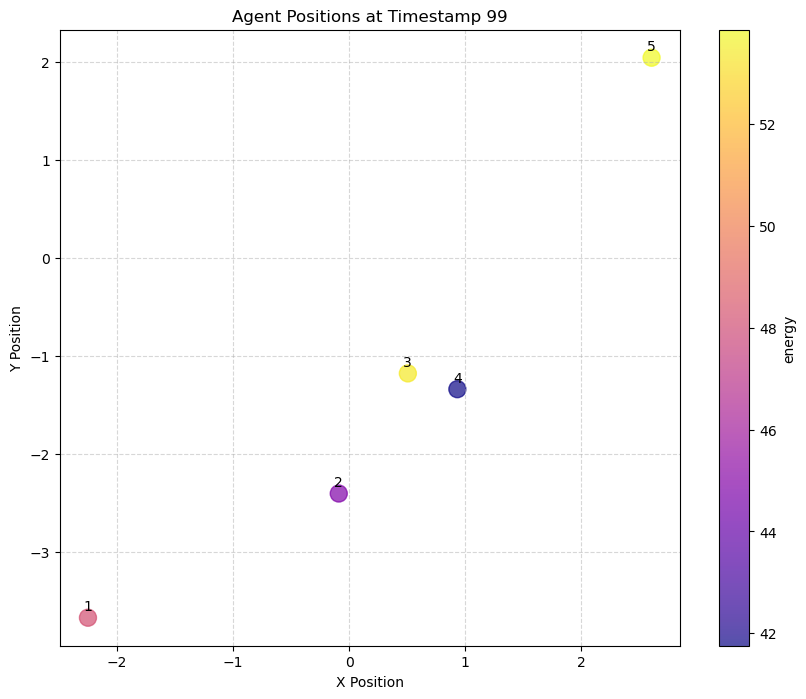

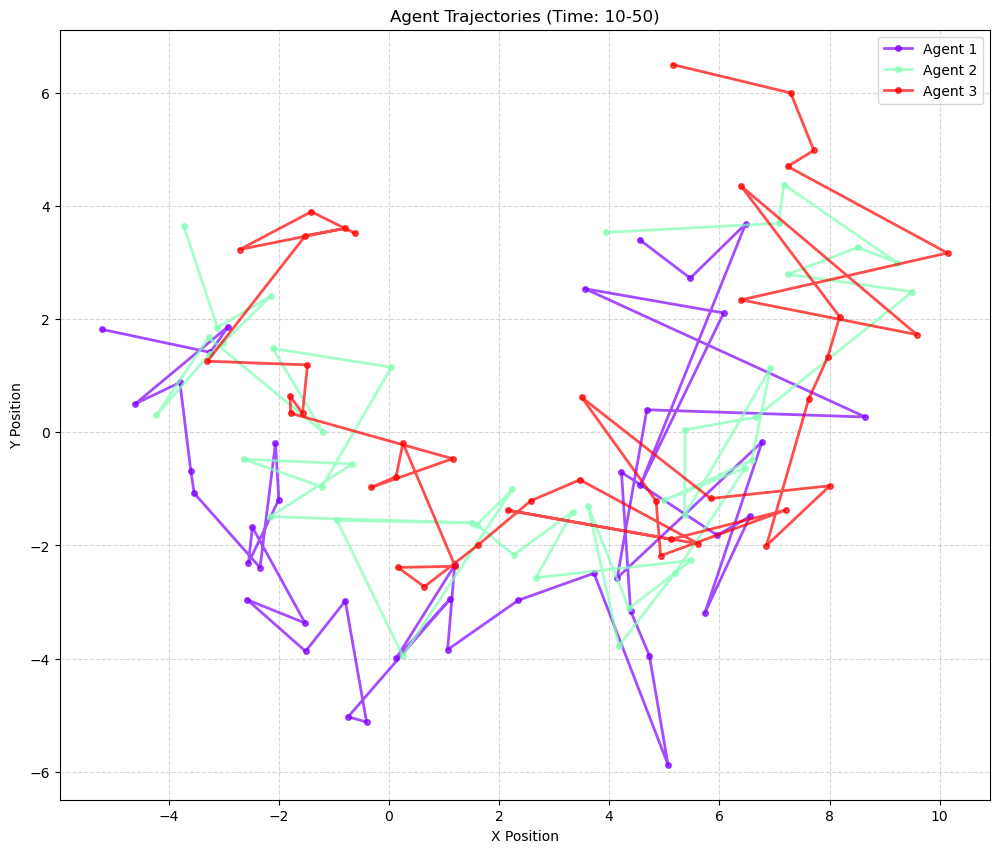

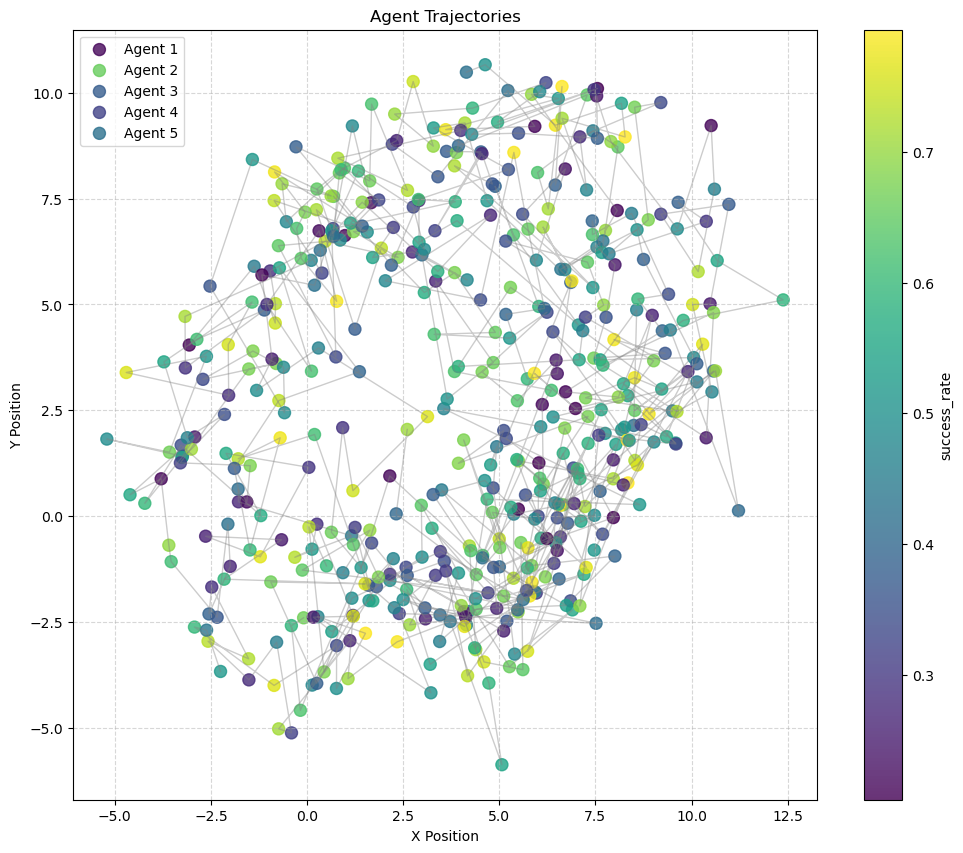

In [7]:
class AgentVisualizer:
    """
    Class for customizable agent behavior visualization
    """
    def __init__(self, data):
        """
        Initialize the visualizer with agent data
        
        Parameters:
        data (pandas.DataFrame): Agent behavior data
        """
        self.data = data
        self.timestamps = sorted(data['timestamp'].unique())
        self.agent_ids = sorted(data['agent_id'].unique())
        self.color_map = 'viridis'
        self.marker_size = 100
        self.line_width = 1.5
        self.alpha = 0.7
        self.grid_alpha = 0.5
        
    def set_color_map(self, color_map):
        """Set the colormap used for visualizations"""
        self.color_map = color_map
        return self
    
    def set_marker_size(self, marker_size):
        """Set the marker size for agents"""
        self.marker_size = marker_size
        return self
    
    def set_line_width(self, line_width):
        """Set the line width for trajectory plots"""
        self.line_width = line_width
        return self
    
    def set_alpha(self, alpha):
        """Set the transparency level for visualizations"""
        self.alpha = alpha
        return self
    
    def plot_agent_positions(self, timestamp=None, figsize=(10, 8), 
                            selected_agents=None, variable_color=None):
        """
        Plot agent positions at a specific timestamp with customizable parameters
        
        Parameters:
        timestamp (int): Timestamp to visualize (None = last timestamp)
        figsize (tuple): Figure size as (width, height)
        selected_agents (list): List of agent IDs to include (None = all agents)
        variable_color (str): Name of the variable to use for coloring (None = agent_id)
        """
        if timestamp is None:
            timestamp = self.timestamps[-1]
        
        # Filter data for the specific timestamp
        time_data = self.data[self.data['timestamp'] == timestamp]
        
        # Filter for selected agents if specified
        if selected_agents is not None:
            time_data = time_data[time_data['agent_id'].isin(selected_agents)]
        
        if len(time_data) == 0:
            print(f"No agents found at timestamp {timestamp}")
            return
        
        # Create the plot
        plt.figure(figsize=figsize)
        
        # Choose the color variable
        color_var = variable_color if variable_color is not None else 'agent_id'
        
        # Create a scatter plot of agent positions
        scatter = plt.scatter(
            time_data['x_position'], 
            time_data['y_position'],
            c=time_data[color_var],
            s=self.marker_size,
            cmap=self.color_map,
            alpha=self.alpha
        )
        
        # Add labels and title
        plt.xlabel('X Position')
        plt.ylabel('Y Position')
        title = f'Agent Positions at Timestamp {timestamp}'
        if selected_agents is not None:
            title += f' (Selected Agents: {selected_agents})'
        plt.title(title)
        
        # Add a colorbar
        plt.colorbar(scatter, label=color_var)
        
        # Display agent IDs as text labels
        for _, row in time_data.iterrows():
            plt.annotate(
                f"{int(row['agent_id'])}",
                (row['x_position'], row['y_position']),
                textcoords="offset points",
                xytext=(0, 5),
                ha='center'
            )
        
        plt.grid(True, linestyle='--', alpha=self.grid_alpha)
        plt.show()
    
    def plot_agent_trajectories(self, agent_ids=None, time_range=None, 
                              figsize=(12, 10), variable_color=None):
        """
        Plot agent trajectories with customized parameters
        
        Parameters:
        agent_ids (list): List of agent IDs to include (None = all agents)
        time_range (tuple): (start_time, end_time) to limit the time range
        figsize (tuple): Figure size as (width, height)
        variable_color (str): Name of variable to use for coloring (None = agent_id)
        """
        plt.figure(figsize=figsize)
        
        # Select agents to visualize
        if agent_ids is None:
            agent_ids = self.agent_ids
        
        # Filter by time range if specified
        data = self.data
        if time_range is not None:
            start_time, end_time = time_range
            data = data[(data['timestamp'] >= start_time) & (data['timestamp'] <= end_time)]
        
        # Determine color mapping
        if variable_color is None:
            # One color per agent
            colors = plt.cm.rainbow(np.linspace(0, 1, len(agent_ids)))
            
            for i, agent_id in enumerate(agent_ids):
                agent_data = data[data['agent_id'] == agent_id]
                plt.plot(
                    agent_data['x_position'],
                    agent_data['y_position'],
                    '-o',
                    linewidth=self.line_width,
                    markersize=4,
                    alpha=self.alpha,
                    color=colors[i],
                    label=f'Agent {agent_id}'
                )
        else:
            # Color based on a variable
            for agent_id in agent_ids:
                agent_data = data[data['agent_id'] == agent_id]
                
                points = plt.scatter(
                    agent_data['x_position'],
                    agent_data['y_position'],
                    c=agent_data[variable_color],
                    s=self.marker_size/2,
                    cmap=self.color_map,
                    alpha=self.alpha,
                    label=f'Agent {agent_id}'
                )
                
                # Connect points with lines
                plt.plot(
                    agent_data['x_position'],
                    agent_data['y_position'],
                    '-',
                    linewidth=self.line_width/2,
                    alpha=self.alpha/2,
                    color='gray'
                )
            
            plt.colorbar(points, label=variable_color)
        
        # Set plot attributes
        title = 'Agent Trajectories'
        if time_range is not None:
            title += f' (Time: {time_range[0]}-{time_range[1]})'
        
        plt.xlabel('X Position')
        plt.ylabel('Y Position')
        plt.title(title)
        plt.legend()
        plt.grid(True, linestyle='--', alpha=self.grid_alpha)
        plt.show()
    
    def create_interactive_visualization(self, max_frames=100):
        """
        Create an interactive visualization with customizable parameters
        
        Parameters:
        max_frames (int): Maximum number of frames to include
        
        Returns:
        plotly.graph_objects.Figure: Interactive visualization
        """
        # Limit the number of timestamps if needed
        timestamps = self.timestamps
        if len(timestamps) > max_frames:
            timestamps = timestamps[:max_frames]
        
        # Create the figure
        fig = px.scatter(
            data_frame=self.data[self.data['timestamp'].isin(timestamps)],
            x='x_position',
            y='y_position',
            animation_frame='timestamp',
            animation_group='agent_id',
            color='agent_id',
            size='energy',
            hover_name='agent_id',
            hover_data=['state', 'success_rate'],
            title='Interactive Agent Movement Visualization',
            labels={'x_position': 'X Position', 'y_position': 'Y Position'},
            range_x=[self.data['x_position'].min() - 1, self.data['x_position'].max() + 1],
            range_y=[self.data['y_position'].min() - 1, self.data['y_position'].max() + 1]
        )
        
        # Customize the visualization
        fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))
        
        fig.update_layout(
            autosize=True,
            width=900,
            height=700,
            plot_bgcolor="white",
            legend_title_text='Agent ID'
        )
        
        # Add path traces to show trajectories
        for agent_id in self.agent_ids:
            agent_data = self.data[self.data['agent_id'] == agent_id]
            
            fig.add_trace(
                go.Scatter(
                    x=agent_data['x_position'],
                    y=agent_data['y_position'],
                    mode='lines',
                    line=dict(width=1, color='rgba(0,0,0,0.3)'),
                    showlegend=False
                )
            )
        
        return fig

# Example usage of the customizable visualizer
visualizer = AgentVisualizer(agent_data)

# Example 1: Basic position plot with default settings
visualizer.plot_agent_positions()

# Example 2: Customized position plot with energy as the color variable
visualizer.set_color_map('plasma').set_marker_size(150).plot_agent_positions(variable_color='energy')

# Example 3: Customized trajectory plot for specific agents
visualizer.set_color_map('viridis').set_line_width(2).plot_agent_trajectories(
    agent_ids=[1, 2, 3], 
    time_range=(10, 50)
)

# Example 4: Trajectory plot colored by state
visualizer.set_alpha(0.8).plot_agent_trajectories(variable_color='success_rate')

# Example 5: Create an interactive visualization
interactive_viz = visualizer.create_interactive_visualization(max_frames=50)
interactive_viz

## Summary and Conclusions

In this notebook, we've implemented visualizations for agent behavior in a SAT solver environment. The key components include:

1. **Data Loading and Preparation**: Functions to load and prepare agent behavior data
2. **Movement Visualization**: Static, trajectory, and animated visualizations of agent movements
3. **Interaction Analysis**: Tools for identifying and visualizing agent interactions like proximity and collisions
4. **Customizable Visualization**: A flexible visualization class to customize parameters like colors, time intervals, and markers

These visualizations provide insights into how agents move and interact in the environment, helping to understand the behavior patterns of the hybrid SAT solver. By analyzing these patterns, we can potentially identify areas for optimization and improvement in the solver's behavior.

## Data Processing Module

This section contains functions for processing data from the StructuredLogger and preparing it for visualization.

In [8]:
import os
import json
import sys

# Add the parent directory to path to import local modules
sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('.'))

# Import the StructuredLogger
try:
    from utils.logging_utils import StructuredLogger, create_logger
    print("Successfully imported logging utilities")
except ImportError as e:
    print(f"Error importing logging utilities: {e}")

class DataProcessor:
    """Process data from StructuredLogger into visualization-ready formats"""
    
    def __init__(self):
        self.metadata = None
        self.variable_assignments = None
        self.clause_counts = None
        self.agent_behavior = None
        self.agent_decisions = None
        self.rewards = None
    
    def load_from_metadata(self, metadata_file):
        """Load all data using a visualization metadata file"""
        try:
            # Load the metadata file
            with open(metadata_file, 'r') as f:
                self.metadata = json.load(f)
            
            print(f"Loaded metadata from {metadata_file}")
            
            # Load data files according to metadata
            data_files = self.metadata['data_files']
            
            if 'variable_assignments' in data_files:
                self.variable_assignments = pd.read_csv(data_files['variable_assignments'])
                print(f"Loaded variable assignments: {self.variable_assignments.shape[0]} rows")
            
            if 'clause_counts' in data_files:
                self.clause_counts = pd.read_csv(data_files['clause_counts'])
                print(f"Loaded clause counts: {self.clause_counts.shape[0]} rows")
            
            if 'agent_behavior' in data_files:
                self.agent_behavior = pd.read_csv(data_files['agent_behavior'])
                print(f"Loaded agent behavior: {self.agent_behavior.shape[0]} rows")
            
            if 'agent_decisions' in data_files:
                self.agent_decisions = pd.read_csv(data_files['agent_decisions'])
                print(f"Loaded agent decisions: {self.agent_decisions.shape[0]} rows")
                
            if 'rewards' in data_files:
                self.rewards = pd.read_csv(data_files['rewards'])
                print(f"Loaded rewards: {self.rewards.shape[0]} rows")
            
            return True
        
        except Exception as e:
            print(f"Error loading data: {e}")
            return False
    
    def load_from_experiment(self, experiment_name, log_dir='logs'):
        """Load data for a specific experiment name"""
        metadata_file = os.path.join(log_dir, f"{experiment_name}_viz_metadata.json")
        return self.load_from_metadata(metadata_file)
    
    def load_from_logger(self, logger):
        """Load data directly from a StructuredLogger instance"""
        try:
            # Get dataframes from logger
            dfs = logger.get_dataframes()
            
            self.agent_decisions = dfs['agent_decisions']
            self.variable_assignments = dfs['variable_assignments']
            self.rewards = dfs['rewards']
            self.clause_counts = dfs['clause_counts']
            self.agent_behavior = dfs['agent_states']
            
            print(f"Loaded data directly from logger:")
            print(f"  - Agent decisions: {len(self.agent_decisions)} rows")
            print(f"  - Variable assignments: {len(self.variable_assignments)} rows")
            print(f"  - Rewards: {len(self.rewards)} rows")
            print(f"  - Clause counts: {len(self.clause_counts)} rows")
            print(f"  - Agent behavior: {len(self.agent_behavior)} rows")
            
            return True
        except Exception as e:
            print(f"Error loading data from logger: {e}")
            return False
    
    def prepare_variable_assignment_heatmap_data(self):
        """Prepare variable assignment data for heatmap visualization"""
        if self.variable_assignments is None or len(self.variable_assignments) == 0:
            print("No variable assignment data available")
            return None
        
        # Convert the data to a format suitable for a heatmap
        # We want a matrix where rows are variables, columns are timestamps
        try:
            # First get the unique episodes, variables and timestamps
            episodes = sorted(self.variable_assignments['episode'].unique())
            variables = sorted(self.variable_assignments['variable_idx'].unique())
            timestamps = sorted(self.variable_assignments['timestamp'].unique())
            
            # Create heatmap data for each episode
            heatmap_data = {}
            
            for episode in episodes:
                # Filter data for this episode
                episode_data = self.variable_assignments[self.variable_assignments['episode'] == episode]
                
                # Create a DataFrame with variables as rows and timestamps as columns
                heatmap_df = pd.DataFrame(index=variables, columns=timestamps, dtype=float)
                
                # Fill in the values from the variable assignments
                for _, row in episode_data.iterrows():
                    heatmap_df.at[row['variable_idx'], row['timestamp']] = row['assignment']
                
                # Forward fill to handle missing values (keep the previous assignment)
                heatmap_df = heatmap_df.fillna(method='ffill', axis=1)
                
                # Store the heatmap data for this episode
                heatmap_data[episode] = heatmap_df
            
            return heatmap_data
        
        except Exception as e:
            print(f"Error preparing heatmap data: {e}")
            return None
    
    def prepare_clause_satisfaction_data(self):
        """Prepare clause satisfaction data for line plots"""
        if self.clause_counts is None or len(self.clause_counts) == 0:
            print("No clause count data available")
            return None
        
        try:
            # Group by episode and timestamp, aggregate the satisfaction rate
            if 'satisfaction_rate' in self.clause_counts.columns:
                grouped = self.clause_counts.groupby(['episode', 'timestamp'])['satisfaction_rate'].mean().reset_index()
            else:
                # Calculate satisfaction rate if not available
                self.clause_counts['satisfaction_rate'] = self.clause_counts['satisfied_count'] / self.clause_counts['total_count']
                grouped = self.clause_counts.groupby(['episode', 'timestamp'])['satisfaction_rate'].mean().reset_index()
            
            return grouped
        
        except Exception as e:
            print(f"Error preparing clause satisfaction data: {e}")
            return None
    
    def prepare_reward_data(self):
        """Prepare reward data for line plots"""
        if self.rewards is None or len(self.rewards) == 0:
            print("No reward data available")
            return None
        
        try:
            # Group by episode and step, calculate mean reward
            if 'step' in self.rewards.columns:
                grouped = self.rewards.groupby(['episode', 'step'])['reward'].mean().reset_index()
            elif 'timestamp' in self.rewards.columns:
                grouped = self.rewards.groupby(['episode', 'timestamp'])['reward'].mean().reset_index()
                grouped = grouped.rename(columns={'timestamp': 'step'})
            else:
                print("Reward data doesn't have step or timestamp column")
                return None
            
            # Calculate cumulative rewards per episode
            episodes = sorted(grouped['episode'].unique())
            cumulative_rewards = {}
            
            for episode in episodes:
                episode_data = grouped[grouped['episode'] == episode]
                cumulative_rewards[episode] = episode_data['reward'].cumsum()
            
            return {'rewards': grouped, 'cumulative': cumulative_rewards}
        
        except Exception as e:
            print(f"Error preparing reward data: {e}")
            return None
    
    def prepare_agent_state_data(self):
        """Prepare agent state data for visualization"""
        if self.agent_behavior is None or len(self.agent_behavior) == 0:
            print("No agent behavior data available")
            return None
        
        try:
            # Group by agent and timestamp
            agent_states = {}
            
            for agent_id in sorted(self.agent_behavior['agent_id'].unique()):
                agent_data = self.agent_behavior[self.agent_behavior['agent_id'] == agent_id]
                agent_states[agent_id] = agent_data.sort_values('timestamp')
            
            return agent_states
        
        except Exception as e:
            print(f"Error preparing agent state data: {e}")
            return None
    
    def calculate_action_entropy(self):
        """Calculate action entropy over time to detect policy convergence"""
        if self.agent_decisions is None or len(self.agent_decisions) == 0:
            print("No agent decision data available")
            return None
        
        try:
            import scipy.stats as stats
            
            # Group by agent_id, variable_id and count actions
            if 'variable_id' in self.agent_decisions.columns:
                variable_col = 'variable_id'
            elif 'variable_idx' in self.agent_decisions.columns:
                variable_col = 'variable_idx'
            else:
                print("Cannot find variable identifier column")
                return None
            
            # Group by episode and time window
            if 'step' in self.agent_decisions.columns:
                step_col = 'step'
            elif 'timestamp' in self.agent_decisions.columns:
                step_col = 'timestamp'
            else:
                print("Cannot find step/timestamp column")
                return None
            
            # Add a window column for entropy calculation
            window_size = 10  # Calculate entropy over 10-step windows
            self.agent_decisions['window'] = (self.agent_decisions[step_col] // window_size) * window_size
            
            entropy_data = []
            
            # Calculate entropy for each agent, episode and window
            for agent_id in self.agent_decisions['agent_id'].unique():
                agent_data = self.agent_decisions[self.agent_decisions['agent_id'] == agent_id]
                
                for episode in agent_data['episode'].unique():
                    episode_data = agent_data[agent_data['episode'] == episode]
                    
                    for window in episode_data['window'].unique():
                        window_data = episode_data[episode_data['window'] == window]
                        
                        # Count actions (0 or 1) for each variable
                        action_counts = window_data.groupby(variable_col)['action'].value_counts().unstack(fill_value=0)
                        
                        # Calculate entropy for each variable
                        entropies = []
                        for _, row in action_counts.iterrows():
                            counts = row.values
                            if sum(counts) > 0:
                                # Normalize to get probabilities
                                probs = counts / sum(counts)
                                # Calculate entropy
                                entropy = stats.entropy(probs, base=2)
                                entropies.append(entropy)
                        
                        # Average entropy across variables
                        if entropies:
                            avg_entropy = sum(entropies) / len(entropies)
                        else:
                            avg_entropy = 0
                        
                        entropy_data.append({
                            'agent_id': agent_id,
                            'episode': episode,
                            'window': window,
                            'entropy': avg_entropy
                        })
            
            return pd.DataFrame(entropy_data)
        
        except Exception as e:
            print(f"Error calculating action entropy: {e}")
            return None

# Example usage
processor = DataProcessor()

# Test with sample data
# Uncomment and modify the path to load data from a specific experiment
# processor.load_from_experiment("my_experiment")

Successfully imported logging utilities


## Integration Script: Run Solver and Generate Visualizations

This section provides a complete pipeline to run the SAT solver and automatically generate visualizations from the collected data.

In [9]:
import os
import sys
import time
import random
import numpy as np
from datetime import datetime

# Add the parent directory to path to import solver modules
sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('.'))

# Import the StructuredLogger
try:
    from utils.logging_utils import create_logger
except ImportError as e:
    print(f"Error importing logging utilities: {e}")

class SATSolverSimulator:
    """Simulation of a SAT solver for visualization testing"""
    
    def __init__(self, num_variables=20, num_clauses=80, num_episodes=5, max_steps=100):
        """Initialize the SAT solver simulator"""
        self.num_variables = num_variables
        self.num_clauses = num_clauses
        self.num_episodes = num_episodes
        self.max_steps = max_steps
        
        # Create a logger
        self.logger = create_logger(
            experiment_name=f"sat_sim_{num_variables}vars_{datetime.now().strftime('%Y%m%d_%H%M%S')}",
            visualize_ready=True
        )
    
    def run(self):
        """Run the simulation"""
        print(f"Starting simulation with {self.num_variables} variables and {self.num_clauses} clauses")
        
        # Run episodes
        for episode in range(self.num_episodes):
            print(f"Episode {episode+1}/{self.num_episodes}")
            self.run_episode(episode)
        
        # Finalize logging
        metadata_file = self.logger.finalize()
        print(f"Simulation complete. Metadata saved to: {metadata_file}")
        
        return metadata_file
    
    def run_episode(self, episode):
        """Run a single episode"""
        # Initialize agent state
        agent_state = {
            'state': 'exploring',
            'energy': 100.0,
            'success_rate': 0.5,
            'x_position': 0.0,
            'y_position': 0.0
        }
        
        # Initialize variable assignments
        assignments = [-1] * self.num_variables  # -1 = unassigned
        
        # Track satisfied clauses
        satisfied_count = 0
        total_count = self.num_clauses
        
        # Log initial variable assignments
        for var_idx in range(self.num_variables):
            self.logger.log_variable_assignment(0, var_idx, -1, agent_id=0, episode=episode)
        
        # Main episode loop
        for step in range(1, self.max_steps + 1):
            # Choose a variable to assign
            var_idx = self._choose_variable(assignments)
            
            # Choose an action (0 or 1)
            action = random.choice([0, 1])
            
            # Update assignments
            assignments[var_idx] = action
            
            # Update satisfied clauses
            old_satisfied = satisfied_count
            satisfied_count = self._update_satisfied_count(assignments)
            
            # Calculate reward based on change in satisfied clauses
            reward = (satisfied_count - old_satisfied) / total_count
            
            # Update agent state
            agent_state = self._update_agent_state(agent_state, step, reward)
            
            # Log the agent decision
            self.logger.log_agent_decision(
                episode=episode,
                step=step,
                agent_id=0,
                variable_id=var_idx,
                action=action,
                activity_score=random.random()
            )
            
            # Log the reward
            self.logger.log_reward(
                episode=episode,
                step=step,
                reward=reward,
                clause_satisfaction=satisfied_count,
                conflict_count=total_count - satisfied_count,
                agent_id=0
            )
            
            # Log agent state
            self.logger.log_agent_state(
                step=step,
                state_dict=agent_state,
                agent_id=0,
                episode=episode
            )
            
            # Check if all clauses are satisfied
            if satisfied_count == total_count:
                print(f"Episode {episode}: All clauses satisfied at step {step}!")
                break
        
        print(f"Episode {episode} completed with {satisfied_count}/{total_count} clauses satisfied")
    
    def _choose_variable(self, assignments):
        """Choose a variable to assign"""
        # Randomly choose an unassigned variable if available
        unassigned = [i for i, val in enumerate(assignments) if val == -1]
        if unassigned:
            return random.choice(unassigned)
        else:
            # If all variables are assigned, choose one to reassign
            return random.randint(0, self.num_variables - 1)
    
    def _update_satisfied_count(self, assignments):
        """Update the count of satisfied clauses"""
        # Simulate a random increase in satisfied clauses
        assigned_count = sum(1 for a in assignments if a != -1)
        assignment_ratio = assigned_count / self.num_variables
        
        # Simulate a realistic satisfaction curve: 
        # - Low at the beginning
        # - Increases as more variables are assigned
        # - Flattens out as we approach full assignment
        base_satisfaction = 0.6 * assignment_ratio * self.num_clauses
        noise = 0.1 * self.num_clauses * (random.random() - 0.5)
        
        # Add a bias toward the end to simulate success
        if assignment_ratio > 0.8:
            bias = 0.3 * (assignment_ratio - 0.8) / 0.2 * self.num_clauses
        else:
            bias = 0
        
        satisfied = int(base_satisfaction + noise + bias)
        satisfied = max(0, min(satisfied, self.num_clauses))  # Clamp
        
        return satisfied
    
    def _update_agent_state(self, state, step, reward):
        """Update the agent state"""
        new_state = state.copy()
        
        # Update energy (decreases over time, increases with positive rewards)
        new_state['energy'] = max(0, min(100, state['energy'] - 1 + reward * 20))
        
        # Update success rate (moving average)
        if reward > 0:
            new_state['success_rate'] = 0.9 * state['success_rate'] + 0.1 * 1.0
        else:
            new_state['success_rate'] = 0.9 * state['success_rate'] + 0.1 * 0.0
        
        # Update position (random walk with bias)
        new_state['x_position'] = state['x_position'] + 0.1 * np.random.normal() + 0.05 * reward
        new_state['y_position'] = state['y_position'] + 0.1 * np.random.normal() + 0.05 * reward
        
        # Update state based on energy and success rate
        if new_state['energy'] < 20:
            new_state['state'] = 'exhausted'
        elif new_state['success_rate'] > 0.7:
            new_state['state'] = 'exploiting'
        elif step < 10:
            new_state['state'] = 'exploring'
        else:
            new_state['state'] = random.choice(['exploring', 'exploiting', 'backtracking'])
        
        return new_state

# Function to run the solver and generate visualizations
def run_solver_and_visualize(num_variables=20, num_clauses=80, num_episodes=5, max_steps=100):
    """Run the SAT solver and generate visualizations"""
    # Run the solver
    simulator = SATSolverSimulator(
        num_variables=num_variables,
        num_clauses=num_clauses,
        num_episodes=num_episodes,
        max_steps=max_steps
    )
    
    metadata_file = simulator.run()
    
    # Process the data
    processor = DataProcessor()
    if processor.load_from_metadata(metadata_file):
        print("Data loaded successfully for visualization")
        
        # Return the processor for visualization
        return processor
    else:
        print("Failed to load data for visualization")
        return None

# Uncomment to run a simulation and visualization
# processor = run_solver_and_visualize(num_variables=30, num_clauses=120, num_episodes=3, max_steps=50)

## Example Usage: Full Pipeline Demonstration

This section demonstrates the complete pipeline from running the solver to generating visualizations.

In [10]:
# Run a SAT solver simulation and collect data
processor = run_solver_and_visualize(
    num_variables=25,  # Number of variables in the SAT problem
    num_clauses=100,   # Number of clauses
    num_episodes=3,    # Number of solving episodes
    max_steps=40       # Maximum steps per episode
)

2025-05-02 23:10:58,081 - utils.logging_utils - INFO - Structured logging finalized for experiment: sat_sim_25vars_20250502_231058


Starting simulation with 25 variables and 100 clauses
Episode 1/3
Episode 0 completed with 86/100 clauses satisfied
Episode 2/3
Episode 1 completed with 86/100 clauses satisfied
Episode 3/3
Episode 2 completed with 93/100 clauses satisfied
Simulation complete. Metadata saved to: logs/sat_sim_25vars_20250502_231058_viz_metadata.json
Loaded metadata from logs/sat_sim_25vars_20250502_231058_viz_metadata.json
Loaded variable assignments: 195 rows
Loaded clause counts: 120 rows
Loaded agent behavior: 120 rows
Loaded agent decisions: 120 rows
Loaded rewards: 120 rows
Data loaded successfully for visualization


/var/folders/mp/r7r78rpn17j7b_jvgnkwxsn40000gn/T/ipykernel_5898/2649309732.py:123: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/var/folders/mp/r7r78rpn17j7b_jvgnkwxsn40000gn/T/ipykernel_5898/2649309732.py:123: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/var/folders/mp/r7r78rpn17j7b_jvgnkwxsn40000gn/T/ipykernel_5898/2649309732.py:123: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



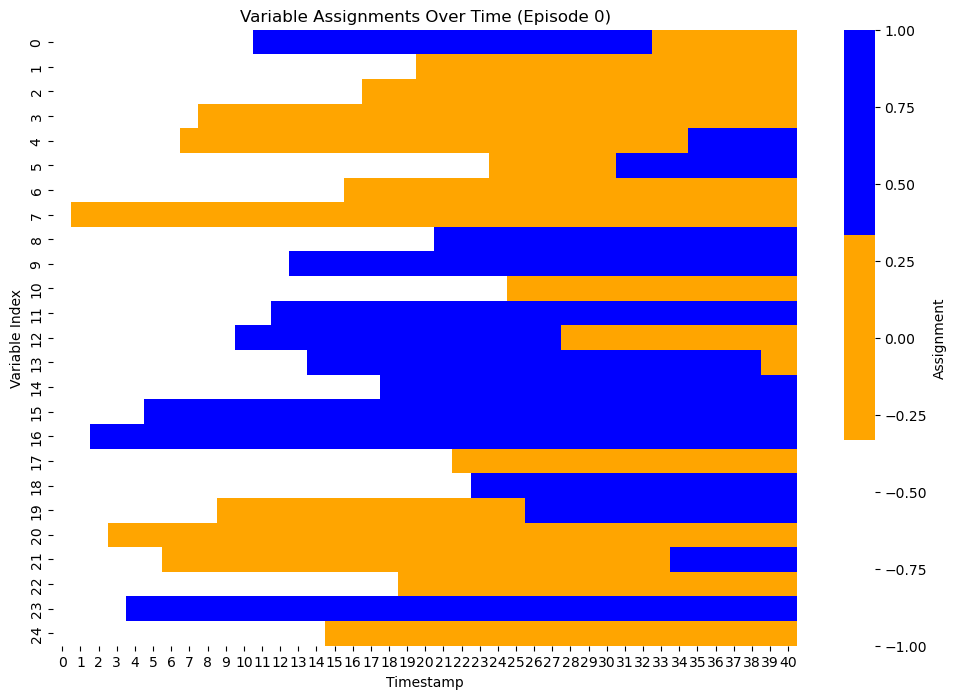

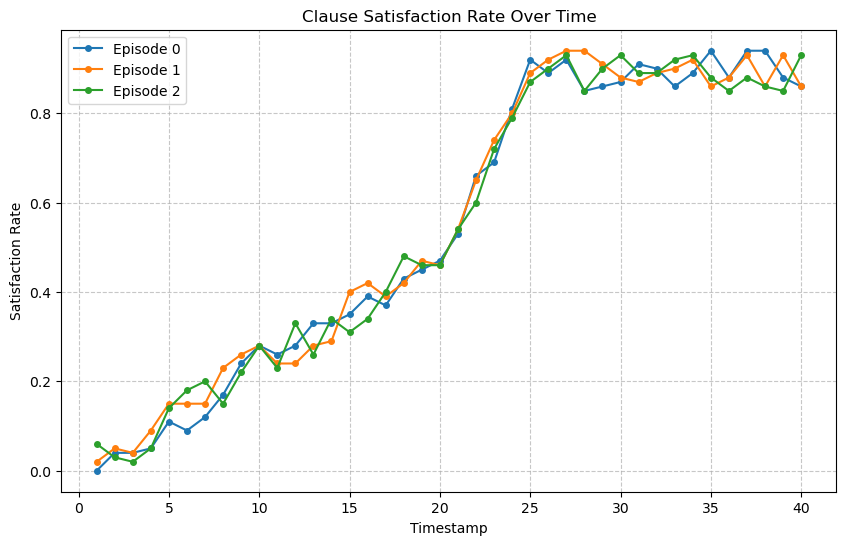

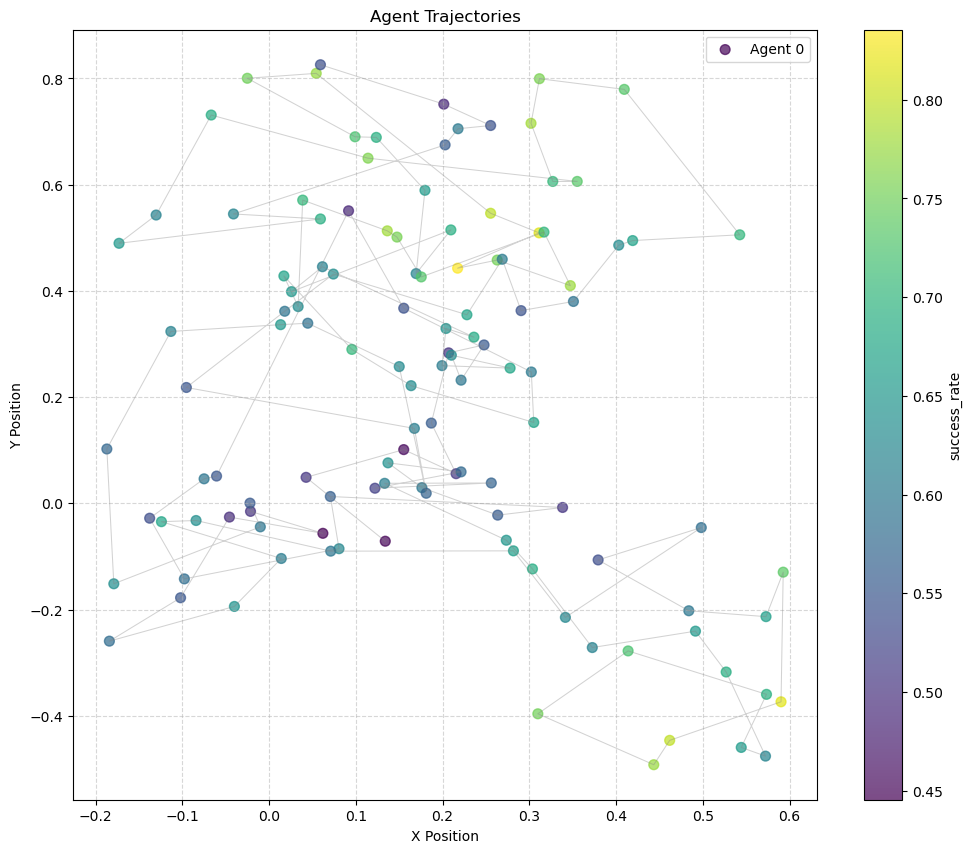

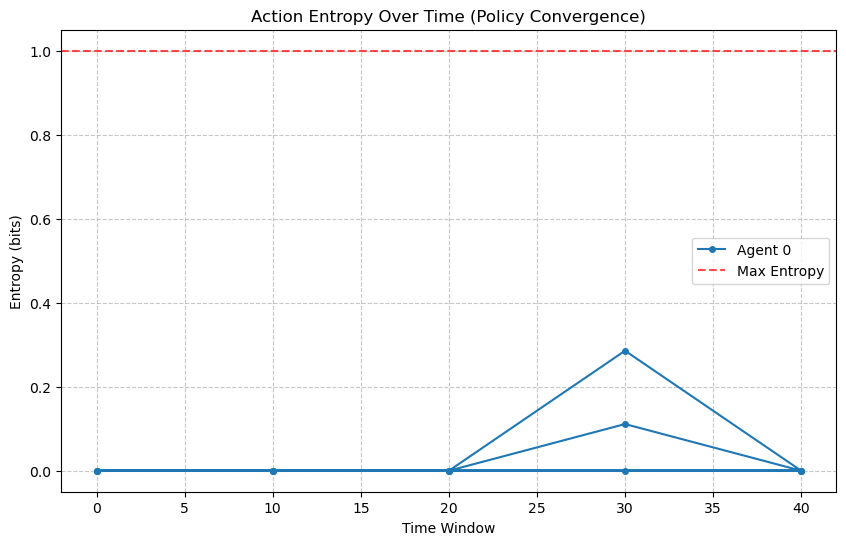

In [11]:
# Create visualizations based on the collected data
if processor is not None:
    # 1. Visualize variable assignments as a heatmap
    heatmap_data = processor.prepare_variable_assignment_heatmap_data()
    
    if heatmap_data:
        # Plot heatmap for the first episode
        episode = list(heatmap_data.keys())[0]
        plt.figure(figsize=(12, 8))
        sns.heatmap(
            heatmap_data[episode],
            cmap=['#FFFFFF', '#FFA500', '#0000FF'],  # White (unassigned), Orange (False), Blue (True)
            cbar_kws={'label': 'Assignment'}
        )
        plt.title(f'Variable Assignments Over Time (Episode {episode})')
        plt.xlabel('Timestamp')
        plt.ylabel('Variable Index')
        plt.show()
    
    # 2. Visualize clause satisfaction over time
    satisfaction_data = processor.prepare_clause_satisfaction_data()
    
    if satisfaction_data is not None:
        plt.figure(figsize=(10, 6))
        
        for episode in sorted(satisfaction_data['episode'].unique()):
            episode_data = satisfaction_data[satisfaction_data['episode'] == episode]
            plt.plot(
                episode_data['timestamp'],
                episode_data['satisfaction_rate'],
                '-o',
                markersize=4,
                label=f'Episode {episode}'
            )
        
        plt.title('Clause Satisfaction Rate Over Time')
        plt.xlabel('Timestamp')
        plt.ylabel('Satisfaction Rate')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
    
    # 3. Visualize agent behavior
    agent_states = processor.prepare_agent_state_data()
    
    if agent_states:
        # Create a visualizer instance
        visualizer = AgentVisualizer(processor.agent_behavior)
        
        # Plot agent trajectories
        visualizer.plot_agent_trajectories(variable_color='success_rate')
        
        # Create interactive visualization
        animation = visualizer.create_interactive_visualization(max_frames=30)
        animation
    
    # 4. Calculate and visualize action entropy
    entropy_data = processor.calculate_action_entropy()
    
    if entropy_data is not None and not entropy_data.empty:
        plt.figure(figsize=(10, 6))
        
        for agent_id in sorted(entropy_data['agent_id'].unique()):
            agent_data = entropy_data[entropy_data['agent_id'] == agent_id]
            
            plt.plot(
                agent_data['window'],
                agent_data['entropy'],
                '-o',
                markersize=4,
                label=f'Agent {agent_id}'
            )
        
        plt.title('Action Entropy Over Time (Policy Convergence)')
        plt.xlabel('Time Window')
        plt.ylabel('Entropy (bits)')
        plt.axhline(y=1.0, color='r', linestyle='--', alpha=0.7, label='Max Entropy')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

## Visualizing SAT Specific Metrics

This section focuses on SAT-specific visualizations like clause-variable graphs and conflict analysis.

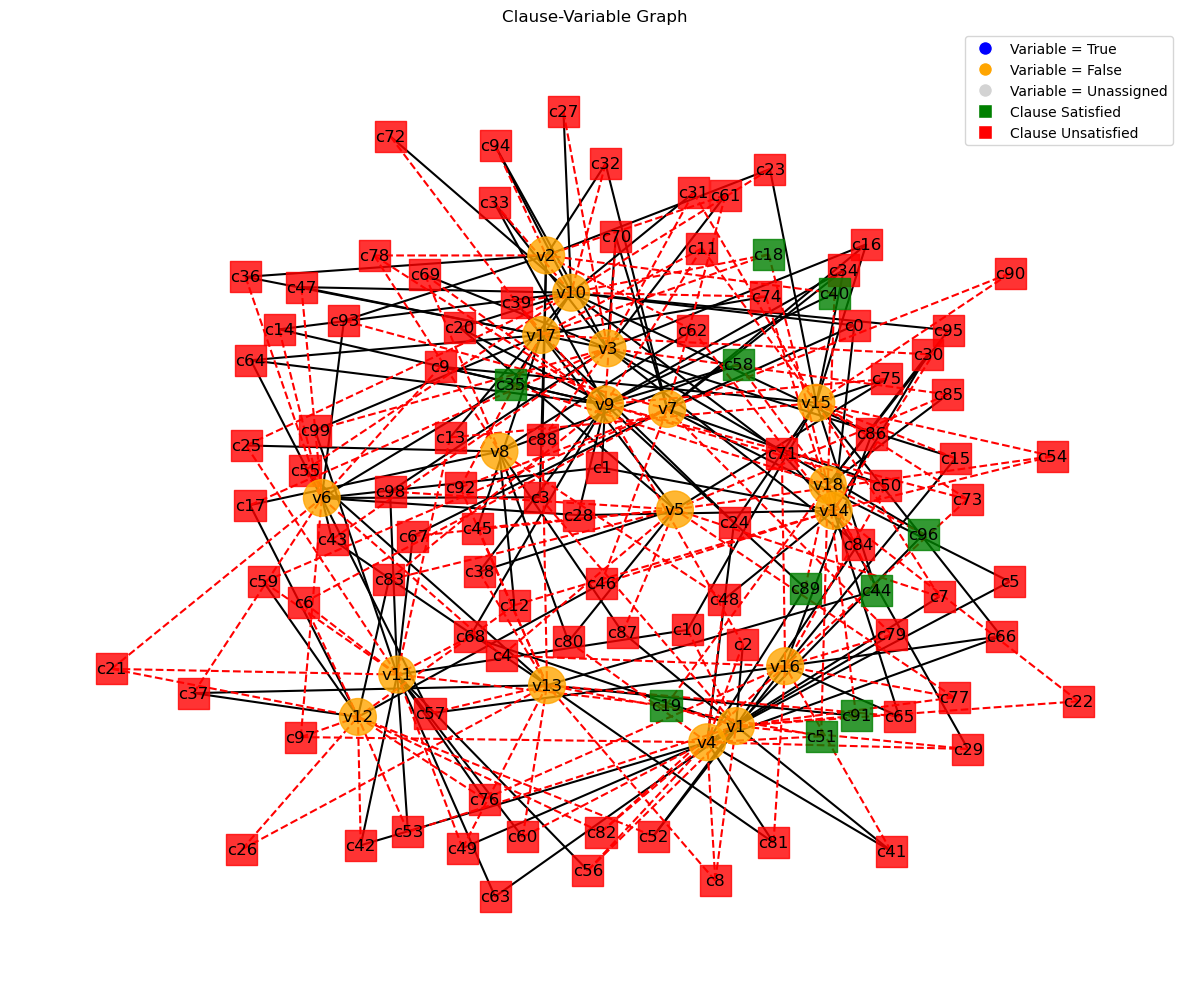

In [12]:
import networkx as nx

def generate_random_sat_instance(n_variables=20, n_clauses=80):
    """Generate a random SAT instance for visualization"""
    # Create random clauses
    clauses = []
    for _ in range(n_clauses):
        # Each clause has 3 literals (3-SAT)
        clause = []
        for _ in range(3):
            variable = random.randint(1, n_variables)
            negated = random.choice([True, False])
            literal = -variable if negated else variable
            clause.append(literal)
        clauses.append(clause)
    
    return clauses

def create_clause_variable_graph(clauses, variable_assignments=None):
    """Create a bipartite graph of clauses and variables"""
    G = nx.Graph()
    
    # Add clause nodes
    for i, clause in enumerate(clauses):
        G.add_node(f'c{i}', type='clause', clause=clause)
    
    # Get the set of all variables
    all_vars = set()
    for clause in clauses:
        for lit in clause:
            all_vars.add(abs(lit))
    
    # Add variable nodes
    for var in all_vars:
        # Get assignment if available
        assignment = None
        if variable_assignments is not None and var-1 < len(variable_assignments):
            assignment = variable_assignments[var-1]
        
        G.add_node(f'v{var}', type='variable', var=var, assignment=assignment)
    
    # Add edges between clauses and variables
    for i, clause in enumerate(clauses):
        for lit in clause:
            G.add_edge(
                f'c{i}',
                f'v{abs(lit)}',
                negated=(lit < 0)
            )
    
    return G

def visualize_clause_variable_graph(G, figsize=(12, 10)):
    """Visualize the clause-variable graph with satisfied/unsatisfied coloring"""
    plt.figure(figsize=figsize)
    
    # Create position layout
    pos = nx.spring_layout(G)
    
    # Collect nodes by type
    clause_nodes = [n for n, d in G.nodes(data=True) if d['type'] == 'clause']
    var_nodes = [n for n, d in G.nodes(data=True) if d['type'] == 'variable']
    
    # Determine clause satisfaction
    clause_colors = []
    for node in clause_nodes:
        clause = G.nodes[node]['clause']
        satisfied = False
        
        for lit in clause:
            var_node = f'v{abs(lit)}'
            if G.nodes[var_node]['assignment'] is not None:
                # Check if literal is satisfied
                if (lit > 0 and G.nodes[var_node]['assignment'] == 1) or \
                   (lit < 0 and G.nodes[var_node]['assignment'] == 0):
                    satisfied = True
                    break
        
        clause_colors.append('green' if satisfied else 'red')
    
    # Determine variable colors based on assignment
    var_colors = []
    for node in var_nodes:
        assignment = G.nodes[node]['assignment']
        if assignment is None:
            var_colors.append('lightgray')  # Unassigned
        elif assignment == 1:
            var_colors.append('blue')       # True
        else:
            var_colors.append('orange')     # False
    
    # Draw the graph
    nx.draw_networkx_nodes(G, pos, nodelist=clause_nodes, node_color=clause_colors, 
                          node_shape='s', node_size=500, alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=var_nodes, node_color=var_colors,
                          node_shape='o', node_size=700, alpha=0.8)
    
    # Draw edges with different colors for negated literals
    regular_edges = [(u, v) for u, v, d in G.edges(data=True) if not d['negated']]
    negated_edges = [(u, v) for u, v, d in G.edges(data=True) if d['negated']]
    
    nx.draw_networkx_edges(G, pos, edgelist=regular_edges, width=1.5)
    nx.draw_networkx_edges(G, pos, edgelist=negated_edges, width=1.5, style='dashed', edge_color='red')
    
    # Add labels
    nx.draw_networkx_labels(G, pos)
    
    # Add legend
    plt.legend([
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgray', markersize=10),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='green', markersize=10),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markersize=10),
    ], [
        'Variable = True',
        'Variable = False',
        'Variable = Unassigned',
        'Clause Satisfied',
        'Clause Unsatisfied'
    ], loc='upper right')
    
    plt.title('Clause-Variable Graph')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage with the processor data
if processor is not None and hasattr(processor, 'variable_assignments') and processor.variable_assignments is not None:
    # Get assignments for the last timestamp of the first episode
    va_data = processor.variable_assignments
    
    if not va_data.empty:
        episode = va_data['episode'].min()
        episode_data = va_data[va_data['episode'] == episode]
        max_timestamp = episode_data['timestamp'].max()
        
        # Get final assignments for each variable
        final_assignments = {}
        for _, row in episode_data[episode_data['timestamp'] == max_timestamp].iterrows():
            final_assignments[row['variable_idx']] = row['assignment']
        
        # Create array of assignments
        max_var = max(final_assignments.keys())
        assignments = [final_assignments.get(i, -1) for i in range(max_var + 1)]
        
        # Generate a random SAT instance
        clauses = generate_random_sat_instance(n_variables=len(assignments), n_clauses=100)
        
        # Create and visualize the graph
        G = create_clause_variable_graph(clauses, assignments)
        visualize_clause_variable_graph(G)
    else:
        print("No variable assignment data available")
else:
    print("No processor data available for clause-variable graph visualization")